In [2]:
import pandas as pd

Loading the dataset 

In [3]:
dataset_dir = "C:/YMCA/Project/archive (11)"

Preprocessing the dataset

In [4]:
import tensorflow as tf

img_height = 32 # The dataset is all 32px but this is here just to make sure
img_width = 32
batch_size = 32

#Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/test",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Quick sanity check to make sure it's all loaded properly
print("Training Classes:")
class_names = train_ds.class_names
print(class_names)

print("Testing Classes:")
class_names = train_ds.class_names
print(class_names)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Training Classes:
['FAKE', 'REAL']
Testing Classes:
['FAKE', 'REAL']


In [13]:
train_dir = dataset_dir + "/train"
test_dir = dataset_dir + "/test"

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# VGG16

In [9]:
# Set up the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 271s 5us/step


In [15]:
batch_size=32

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Load the training data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(32,32),batch_size=batch_size, class_mode='binary')


Found 100000 images belonging to 2 classes.


In [16]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=50)


Epoch 1/50


C:\Users\khan2\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1071s 341ms/step - accuracy: 0.7758 - loss: 0.4678
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


c:\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 482s 154ms/step - accuracy: 0.8230 - loss: 0.3918
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 506s 162ms/step - accuracy: 0.8347 - loss: 0.3686
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2382s 762ms/step - accuracy: 0.8404 - loss: 0.3587
Epoch 8/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 505s 161ms/step - accuracy: 0.8480 - loss: 0.3485
Epoch 10/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 589s 188ms/step - accuracy: 0.8516 - loss: 0.3403
Epoch 12/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 527s 169ms/step - acc

In [17]:
# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(32,32),
                                                  batch_size=batch_size, class_mode='binary', shuffle=False)

# Make predictions on the test data
predictions = model.predict(test_generator)
labels = [0 if pred < 0.5 else 1 for pred in predictions]

# Calculate accuracy
accuracy = np.sum(np.array(test_generator.labels) == np.array(labels)) / len(labels)

# Print the accuracy
print("\nAccuracy:", accuracy)

cm = confusion_matrix(test_generator.labels, labels)
print("\nConfusion Matrix:")
print(cm)

Found 20000 images belonging to 2 classes.
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 306ms/step

Accuracy: 0.8826

Confusion Matrix:
[[9258  742]
 [1606 8394]]


Confusion Matrix for VGG16

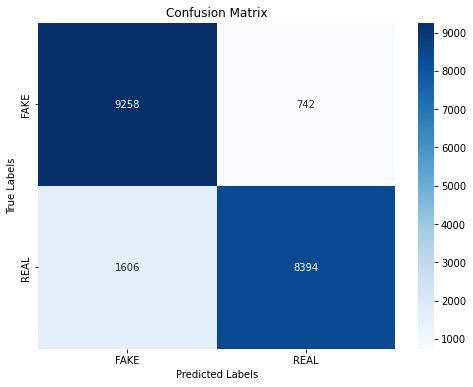

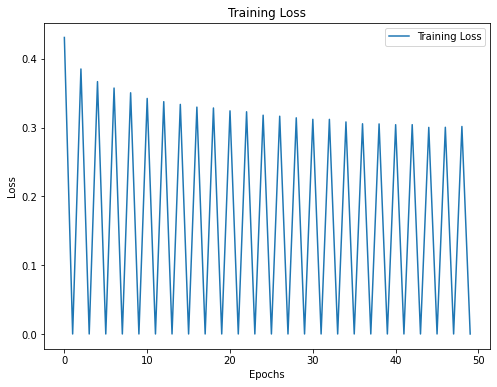

In [18]:
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_generator.labels, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Loss plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# ResNet50 

In [22]:
# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [26]:
#Building the model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [40]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(2, activation='softmax')(x)
model_resnet = Model(inputs = resnet_50.input, outputs = predictions)

In [28]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size)

In [41]:
# launch the training
model_history = trainModel(model = model_resnet, epochs = 15, optimizer = "Adam")

Epoch 1/15


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 469s 146ms/step - accuracy: 0.7434 - loss: 0.6597 - val_accuracy: 0.8723 - val_loss: 0.3046
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 459s 147ms/step - accuracy: 0.8643 - loss: 0.3426 - val_accuracy: 0.8795 - val_loss: 0.2845
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 435s 139ms/step - accuracy: 0.8738 - loss: 0.3223 - val_accuracy: 0.8891 - val_loss: 0.2692
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 407s 130ms/step - accuracy: 0.8782 - loss: 0.3091 - val_accuracy: 0.8886 - val_loss: 0.2701
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 596s 191ms/step - accuracy: 0.8855 - loss: 0.2971 - val_accuracy: 0.8930 - val_loss: 0.2627
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 404s 129ms/step - accuracy: 0.8892 - loss: 0.2875 - val_accuracy: 0.8976 - val_loss: 0.2511
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 420s 134ms/step - accuracy: 0.8933 - loss: 0.2791 - val_accuracy: 0.8996 - val_loss: 0.2487
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 481s 154ms/step - accuracy: 0.8

Calculating the training and validation accuracy for ResNet50 

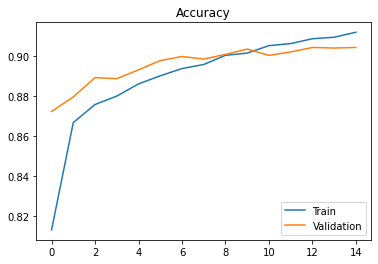

In [42]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [43]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(32,32),
                                                  batch_size=batch_size, class_mode='binary', shuffle=False)
test_loss, test_acc = model_resnet.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

Found 20000 images belonging to 2 classes.
  1/625 ━━━━━━━━━━━━━━━━━━━━ 33:08 3s/step - accuracy: 0.9688 - loss: 0.1516

C:\Users\khan2\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 102ms/step - accuracy: 0.9158 - loss: 0.2145
The test loss is:  0.23563942313194275
The best accuracy is:  90.34000039100647


In [44]:
predictions = model_resnet.predict(test_generator)
# print(predictions)
labels = [0 if pred < 0.5 else 1 for pred in predictions]

625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 93ms/step
[[0.9940941  0.00590594]
 [0.9416091  0.05839089]
 [0.99797803 0.00202194]
 ...
 [0.06950309 0.9304969 ]
 [0.02608231 0.97391766]
 [0.65457094 0.34542903]]


Confusion Matrix for ResNet50 

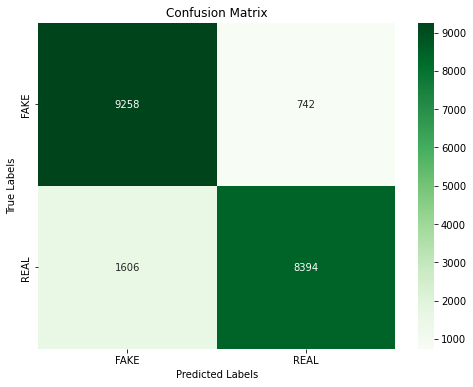

In [45]:
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_generator.labels, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# YOLOv8 

In [2]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt') # load a pretrained model (recommended for training)

# Train the model
model.train(data='C:/YMCA/Project/archive (11)', epochs=5)

100%|██████████| 5.31M/5.31M [00:00<00:00, 15.9MB/s]


Ultralytics YOLOv8.2.48  Python-3.10.0 torch-2.3.1+cpu CPU (Intel Core(TM) i5-1035G1 1.00GHz)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=C:/YMCA/Project/archive (11), epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning C:\YMCA\Project\archive (11)\train... 100000 images, 0 corrupt: 100%|██████████| 100000/100000 [01:00<00:00, 1659.56it/s]


train: New cache created: C:\YMCA\Project\archive (11)\train.cache


val: Scanning C:\YMCA\Project\archive (11)\test... 20000 images, 0 corrupt: 100%|██████████| 20000/20000 [00:11<00:00, 1809.73it/s]


val: New cache created: C:\YMCA\Project\archive (11)\test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs\classify\train
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5         0G     0.7052         16        224:   0%|          | 4/6250 [00:03<1:35:33,  1.09it/s]

100%|██████████| 755k/755k [00:00<00:00, 12.0MB/s]  224:   0%|          | 7/6250 [00:06<1:29:02,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [15:21<00:00,  1.48s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [06:05<00:00,  1.71it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [07:21<00:00,  1.42it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [25:41<00:00,  2.47s/it]   

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [05:46<00:00,  1.81it/s]

                   all      0.973          1



5 epochs completed in 26.856 hours.
Optimizer stripped from runs\classify\train\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train\weights\best.pt, 3.0MB

Validating runs\classify\train\weights\best.pt...
Ultralytics YOLOv8.2.48  Python-3.10.0 torch-2.3.1+cpu CPU (Intel Core(TM) i5-1035G1 1.00GHz)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
WARNING  Dataset 'split=val' not found, using 'split=test' instead.
train: C:\YMCA\Project\archive (11)\train... found 100000 images in 2 classes  
val: None...
test: C:\YMCA\Project\archive (11)\test... found 20000 images in 2 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [05:12<00:00,  2.00it/s]


                   all      0.973          1
Speed: 0.0ms preprocess, 13.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train
Results saved to runs\classify\train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023D27C06E60>
curves: []
curves_results: []
fitness: 0.9865500032901764
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9731000065803528, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9865500032901764}
save_dir: WindowsPath('runs/classify/train')
speed: {'preprocess': 5.8150291442871095e-05, 'inference': 13.317180943489074, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.9731000065803528
top5: 1.0

Confusion Matrix for YOLOv8 model

In [3]:
from PIL import Image
from IPython.display import display


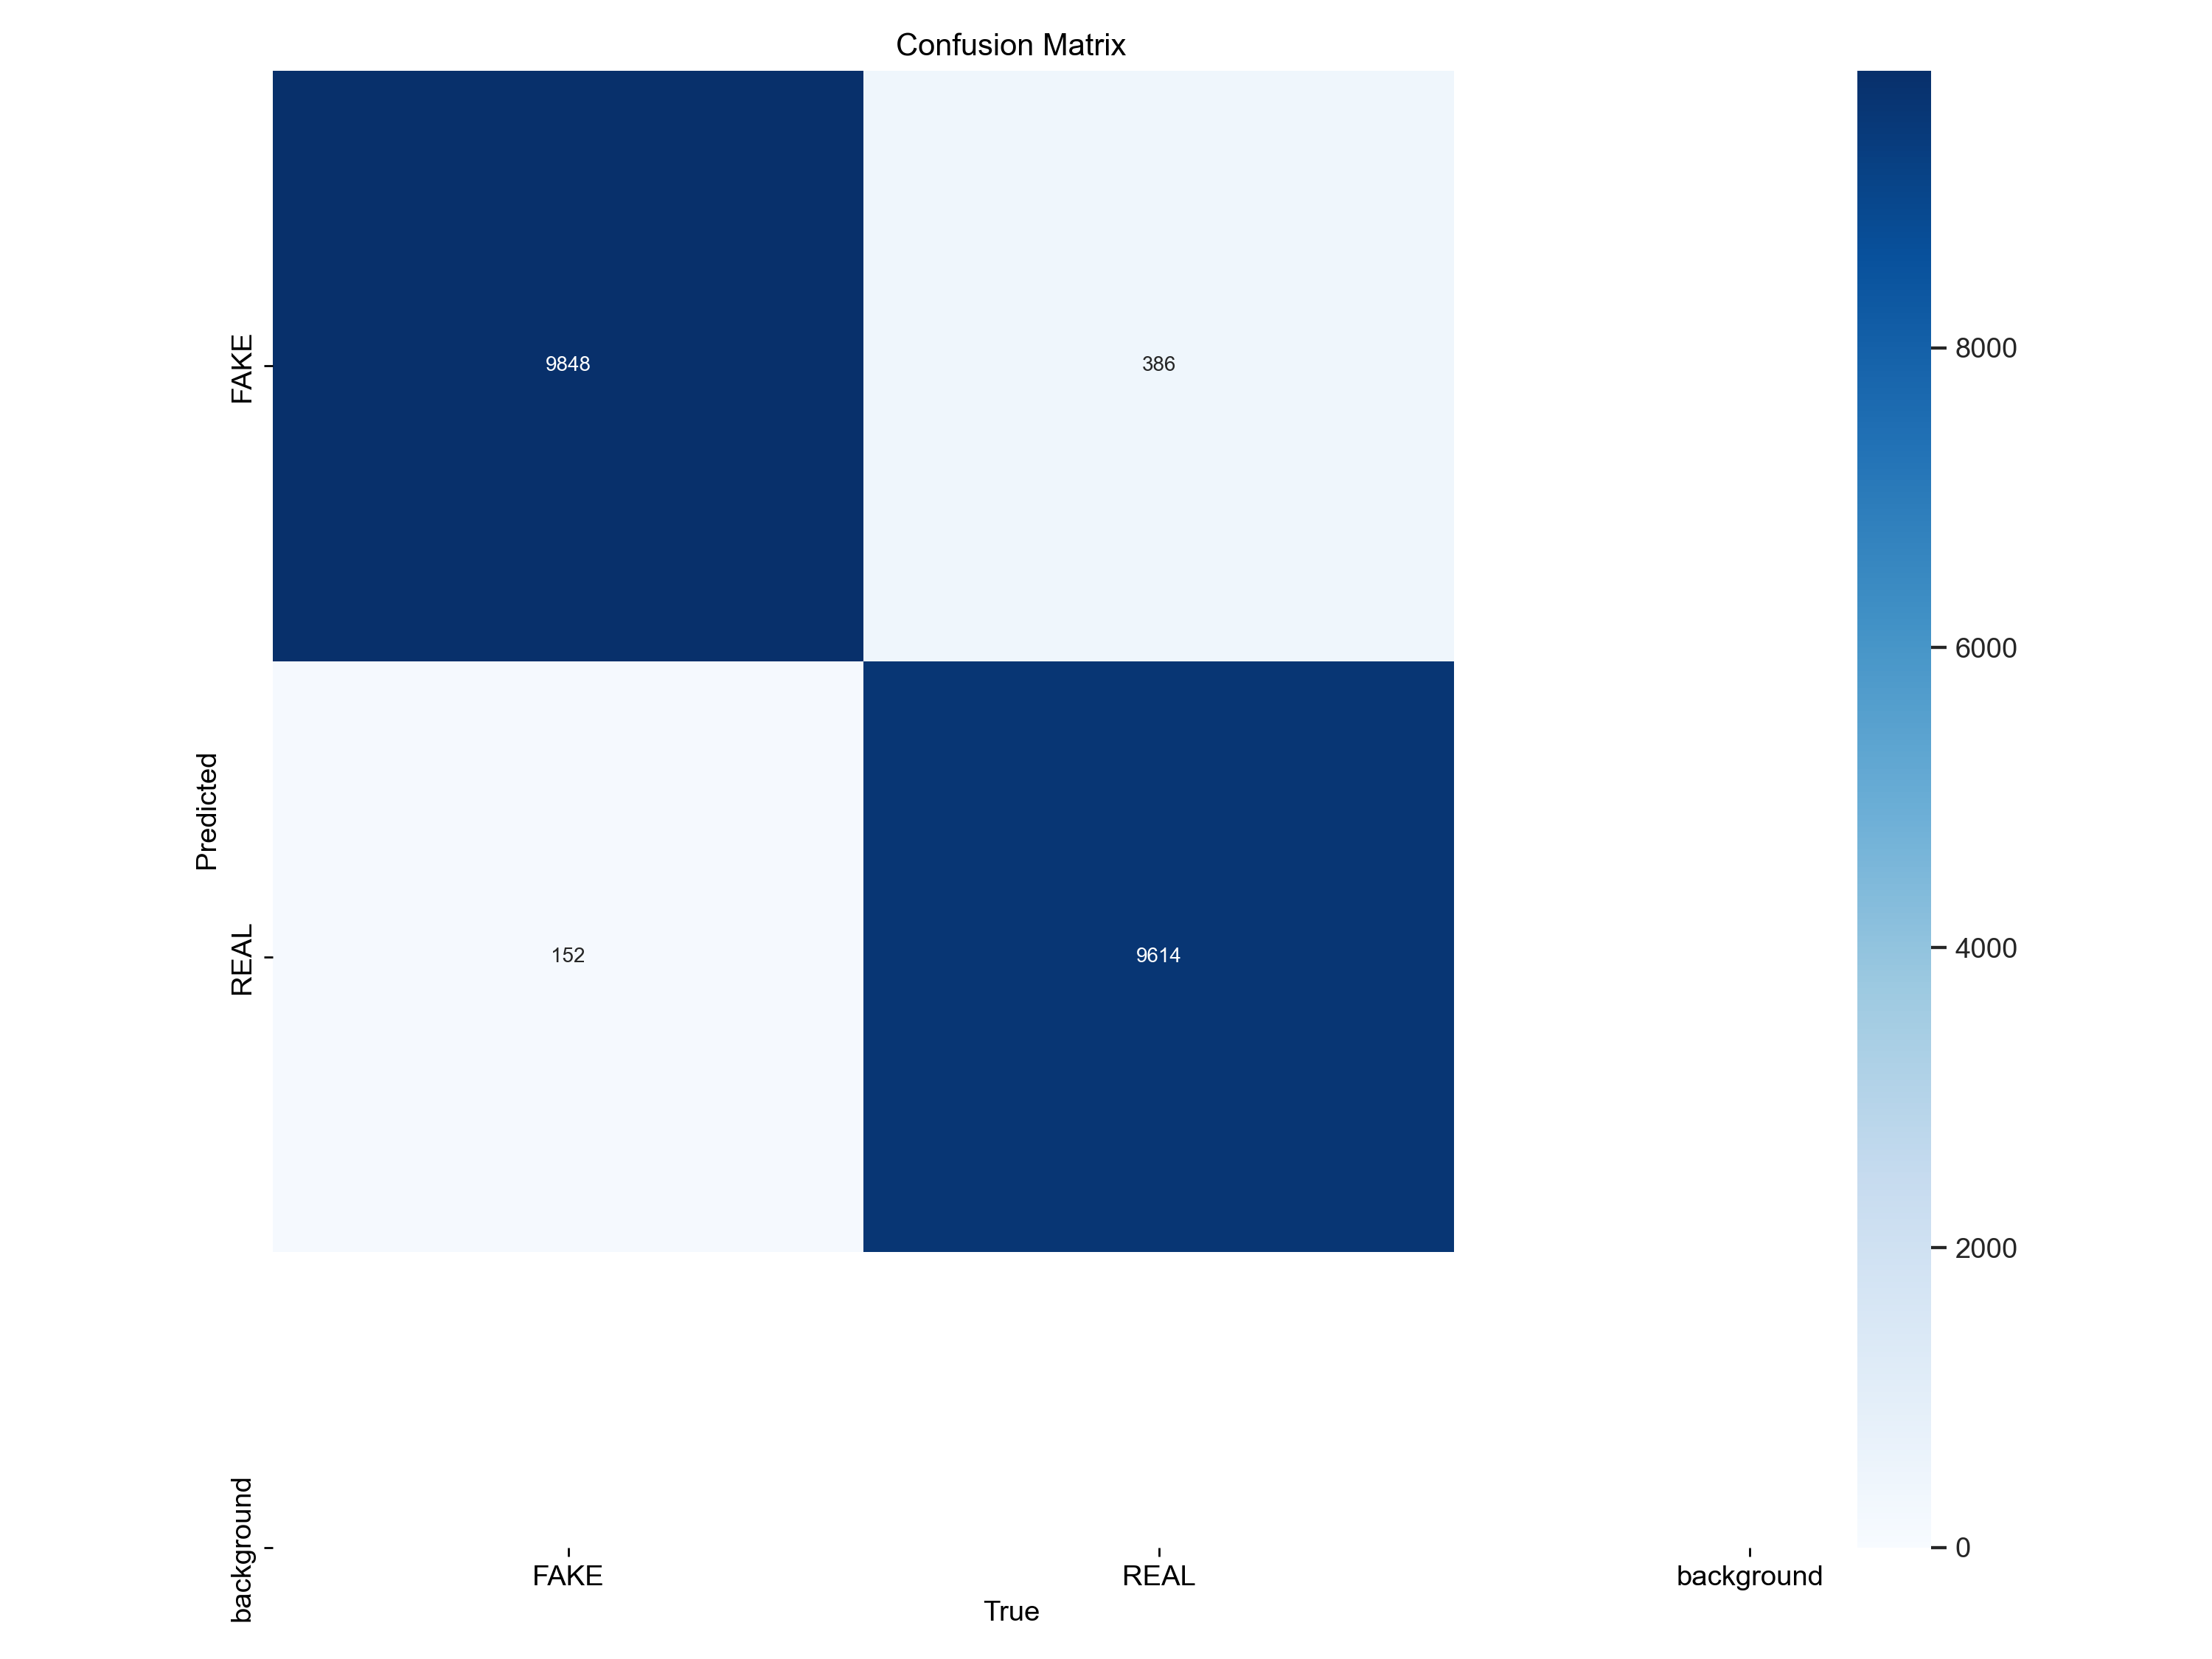

In [11]:
yolo_confusion_matrix = Image.open("C:/YMCA/Project/runs/classify/train/confusion_matrix.png")
yolo_confusion_matrix=yolo_confusion_matrix
display(yolo_confusion_matrix)

Comparing accuracies of the models used

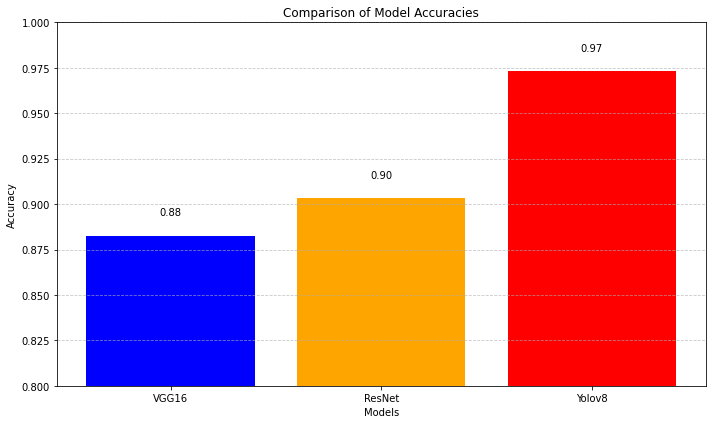

In [13]:
import matplotlib.pyplot as plt

models = ['VGG16', 'ResNet', 'Yolov8']
accuracies = [0.8826, 0.9034, 0.9731] 
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'red'])  
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.8, 1.0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()